In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("loan_data.csv")
df.head(9)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Fill missing categorical values with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\lalan\AppData\Local\Temp\ipykernel_6260\474757570.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [7]:
# Fill missing numerical values
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


C:\Users\lalan\AppData\Local\Temp\ipykernel_6260\1945095881.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
C:\Users\lalan\AppData\Local\Temp\ipykernel_6260\1945095881.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [8]:
#  clean "3+" in Dependents before encoding
df['Dependents'] = df['Dependents'].replace('3+', '3')


In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
#drop Loan_ID(not useful)
if "Loan_ID" in df.columns:
    df.drop(columns="Loan_ID",inplace=True)

In [110]:
df

0      355.555556
1      355.555556
2      183.333333
3      333.333333
4      391.666667
          ...    
609    197.222222
610    222.222222
611    702.777778
612    519.444444
613    369.444444
Name: EMI, Length: 614, dtype: float64

In [12]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [13]:
# One-Hot Encode all categorical variables except target
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
                    'Self_Employed', 'Property_Area']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [14]:
# Encode target manually
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

print(df.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0             1.0            1         True        False         False   
1             1.0            0         True         True          True   
2             1.0            1         True         True         False   
3             1.0            1         True         True         False   
4             1.0            1         True        False         False   

   Dependents_2  Dependents_3  Education_Not Graduate  Self_Employed_Yes  \
0         False         False                   Fals

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Loan_Status              614 non-null    int64  
 6   Gender_Male              614 non-null    bool   
 7   Married_Yes              614 non-null    bool   
 8   Dependents_1             614 non-null    bool   
 9   Dependents_2             614 non-null    bool   
 10  Dependents_3             614 non-null    bool   
 11  Education_Not Graduate   614 non-null    bool   
 12  Self_Employed_Yes        614 non-null    bool   
 13  Property_Area_Semiurban  614 non-null    bool   
 14  Property_Area_Urban      6

In [16]:
# Final preprocessed DataFrame is ready
print(df.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Loan_Status  Gender_Male  Married_Yes  Dependents_1  \
0             1.0            1         True        False         False   
1             1.0            0         True         True          True   
2             1.0            1         True         True         False   
3             1.0            1         True         True         False   
4             1.0            1         True        False         False   

   Dependents_2  Dependents_3  Education_Not Graduate  Self_Employed_Yes  \
0         False         False                   Fals

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")

In [18]:
# Splitting the data into features target
X=df.drop("Loan_Status",axis=1)
Y=df["Loan_Status"]

In [19]:
# Training and testing sets
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
print(f"Training set: {X_train.shape}, {Y_train.shape}")
print(f"Testing set; {X_test.shape}, {Y_test.shape}")

Training set: (491, 14), (491,)
Testing set; (123, 14), (123,)


In [21]:
#  features scalling
scaler=StandardScaler()

In [74]:
# only numeric value features
numeric_features=['ApplicantIncome','CoapplicantIncome','LoanAmount',"Loan_Amount_Term"]
X_train[numeric_features]=scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features]=scaler.fit_transform(X_test[numeric_features])

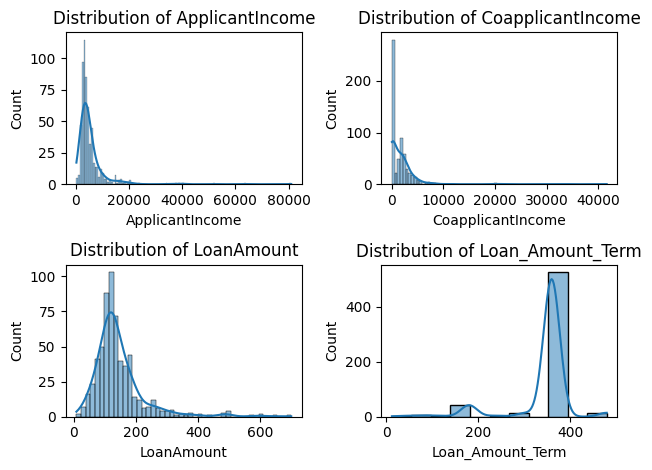

In [121]:
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.savefig('numeric_distributions.png')
plt.close()

In [112]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
plt.figure(figsize=(20, 15))
plt.suptitle('Loan Status by Categorical Features', fontsize=16)

Text(0.5, 0.98, 'Loan Status by Categorical Features')

<Figure size 2000x1500 with 0 Axes>

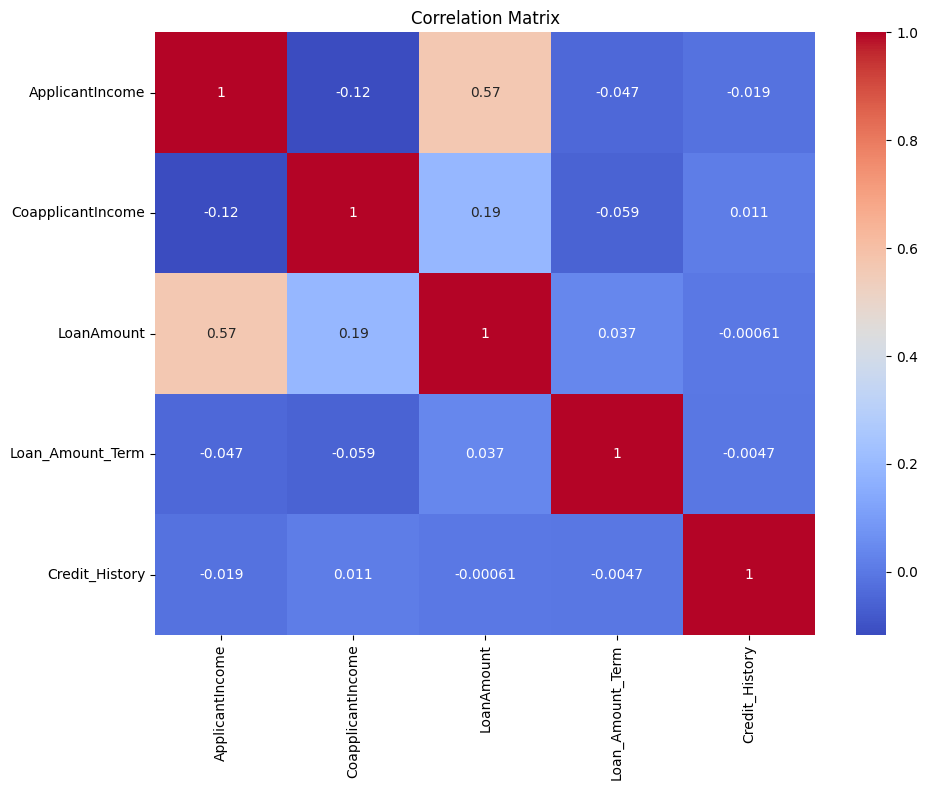

In [116]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features + ['Credit_History']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.close()


In [118]:
print("\n--- Feature Engineering ---")
print("\nSkewness before transformation:")
for feature in numeric_features:
    print(f"{feature}: {df[feature].skew():.4f}")

# Apply log transformation to income features (handling zero values)
df['ApplicantIncome_Log'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome_Log'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount_Log'] = np.log1p(df['LoanAmount'])

print("\nSkewness after log transformation:")
for feature in ['ApplicantIncome_Log', 'CoapplicantIncome_Log', 'LoanAmount_Log']:
    print(f"{feature}: {df[feature].skew():.4f}")

# Create new features
# Total income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_Log'] = np.log1p(df['TotalIncome'])

# Income to loan ratio
df['Income_to_Loan'] = df['TotalIncome'] / (df['LoanAmount'] * 1000)
df['Income_to_Loan'].fillna(df['Income_to_Loan'].median(), inplace=True)
df['Income_to_Loan'].replace([np.inf, -np.inf], df['Income_to_Loan'].median(), inplace=True)

# EMI calculation (approximation)
df['EMI'] = (df['LoanAmount'] * 1000) / df['Loan_Amount_Term']
df['EMI'].fillna(df['EMI'].median(), inplace=True)

# Income to EMI ratio
df['Income_to_EMI'] = df['TotalIncome'] / df['EMI']
df['Income_to_EMI'].fillna(df['Income_to_EMI'].median(), inplace=True)
df['Income_to_EMI'].replace([np.inf, -np.inf], df['Income_to_EMI'].median(), inplace=True)



--- Feature Engineering ---

Skewness before transformation:
ApplicantIncome: 6.5395
CoapplicantIncome: 7.4915
LoanAmount: 2.7431
Loan_Amount_Term: -2.4021

Skewness after log transformation:
ApplicantIncome_Log: 0.4821
CoapplicantIncome_Log: -0.1731
LoanAmount_Log: -0.1516


In [23]:
# PCA (principal component analaysis) APPLY
# 
pca=PCA()
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.fit_transform(X_test)

X_train_pca
X_test_pca


array([[ 1.16828663e+00, -1.39289494e-01,  1.11089299e+00, ...,
         1.06427001e-01,  1.43569373e-01, -3.53610057e-01],
       [-1.09098216e-01, -6.21668876e-01,  6.42314572e-01, ...,
         6.14235265e-02,  9.02787225e-02, -3.25297677e-01],
       [ 1.17204229e-04,  2.64057943e-01,  1.43774191e-01, ...,
         2.97954260e-02,  3.06562592e-02,  1.16962622e-01],
       ...,
       [-1.34651618e+00,  1.18070723e+00,  1.95588709e+00, ...,
        -4.37299748e-01, -5.73782063e-02,  1.33763709e-02],
       [-5.87187955e-01,  1.81629389e-01, -3.12905120e-01, ...,
        -2.67774720e-01,  2.68089623e-02,  1.57132054e-01],
       [ 1.00927837e+01, -5.14725801e-01,  8.78479044e-01, ...,
        -3.29349713e-01,  6.19688561e-02, -1.65592278e-01]])

In [24]:
# explained variance ratio
explained_variance=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance)

cumulative_variance


array([0.33556264, 0.54744287, 0.69113622, 0.75623149, 0.80083281,
       0.83896657, 0.87323374, 0.90269474, 0.92479405, 0.94505567,
       0.96383142, 0.97897996, 0.99139984, 1.        ])

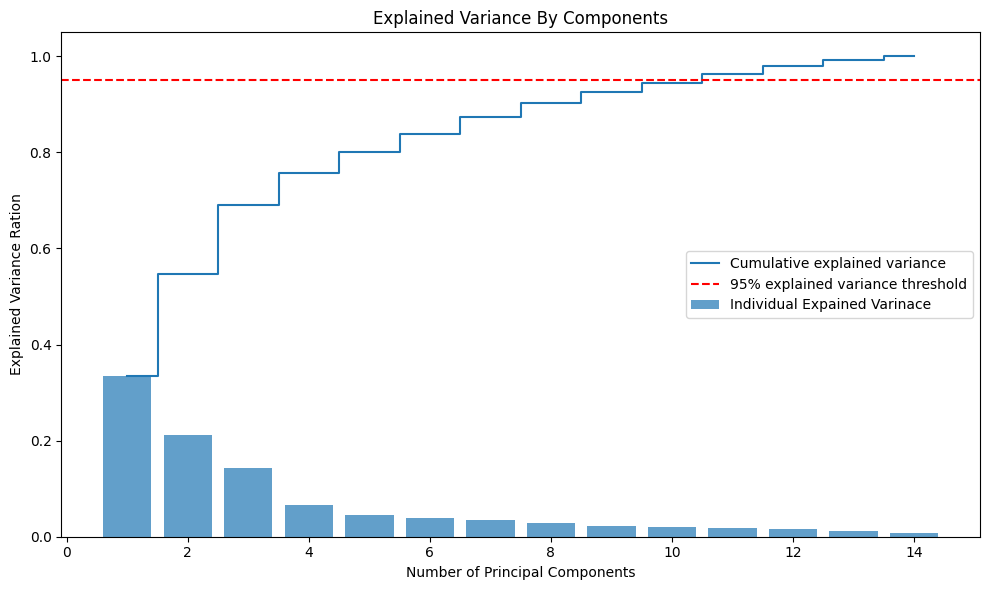

In [26]:
# plotting explained ratio

plt.figure(figsize=(10,6))
plt.bar(range(1,len(explained_variance)+1),explained_variance,alpha=0.7,label="Individual Expained Varinace")
plt.step(range(1,len(cumulative_variance)+1),cumulative_variance,where="mid",label="Cumulative explained variance")
plt.axhline(y=0.95,color="r",linestyle="--",label="95% explained variance threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ration")
plt.title("Explained Variance By Components")
plt.legend()
plt.tight_layout()
plt.savefig('pca_exaplained_varinace.png')
plt.close()

In [27]:
# Determining no of components for 95% variance

n_components_95=np.argmax(cumulative_variance>=0.95)+1
print(f"No of components needed for 95% varinace: {n_components_95}")

No of components needed for 95% varinace: 11


In [28]:
# pca with determine no of compoents
pca_95=PCA(n_components=n_components_95)
X_train_pca_95=pca_95.fit_transform(X_train)
X_test_pca_95=pca_95.transform(X_test)

print(f"Original data dimensions: {X_train.shape}")
print(f"PCA reduced dimensions (95% variance): {X_train_pca_95.shape}")

Original data dimensions: (491, 14)
PCA reduced dimensions (95% variance): (491, 11)


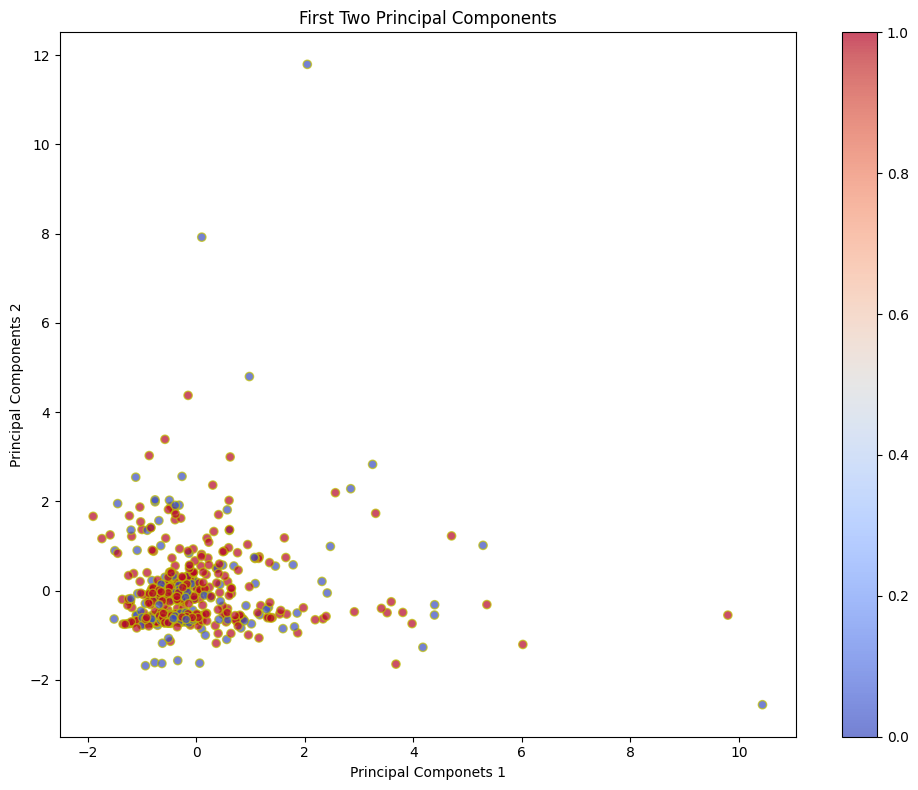

In [29]:
# Visulizing the first two principal

if X_train_pca.shape[1]>=2:
    plt.figure(figsize=(10,8))
    scatter=plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=Y_train,cmap='coolwarm',alpha=0.7,edgecolors='y')
    plt.colorbar(scatter)
    plt.xlabel("Principal Componets 1")
    plt.ylabel("Principal Components 2")
    plt.title("First Two Principal Components")
    plt.tight_layout()
    plt.savefig('pca_visualization.png')
    plt.close()

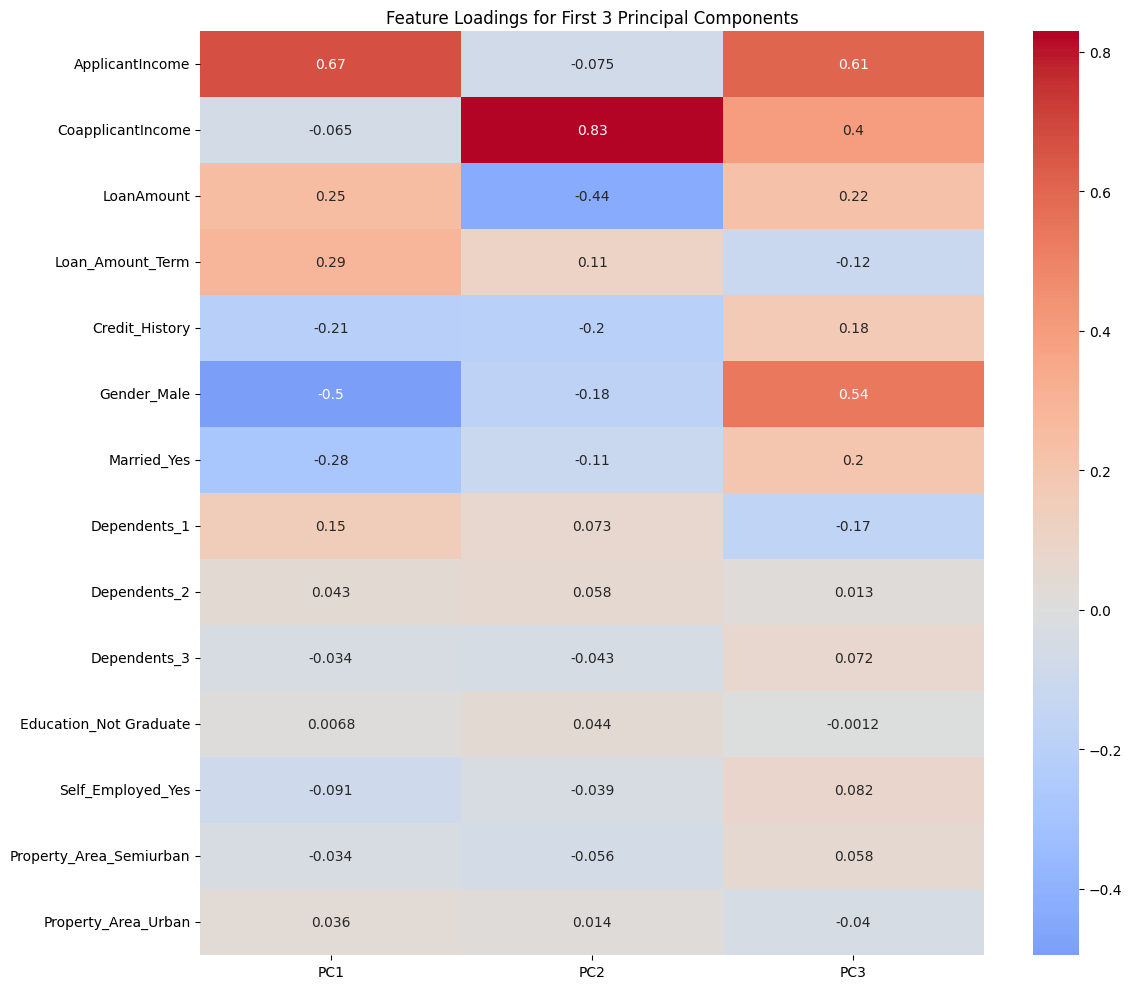

In [30]:
# Visualize the feature loadings for top principal components
if X_train.shape[1]<=30:
    plt.figure(figsize=(12,10))
    components=pca.components_
    component_names=[f'PC{i+1}' for i in range(components.shape[0])]
    loadings=pd.DataFrame(components,columns=component_names,index=X_train.columns)

    # plotting loadings
    num_pc_to_plot=min(3,components.shape[0])
    sns.heatmap(loadings.iloc[:,:num_pc_to_plot],annot=True,cmap="coolwarm",center=0)
    plt.title(f'Feature Loadings for First {num_pc_to_plot} Principal Components')
    plt.tight_layout()
    plt.savefig('pca_feature_loadings.png')
    plt.close()

In [31]:
# Model training and evaluation function

def evaluate_model(model,X_train,X_test,Y_train,Y_test,model_name,is_pca=False):
    model.fit(X_train,Y_train)

    # predictions
    y_pred=model.predict(X_test)

    # calculate metrics
    accuracy=accuracy_score(Y_test,y_pred)
    precision=precision_score(Y_test,y_pred)
    recall=recall_score(Y_test,y_pred)
    f1=f1_score(Y_test,y_pred)

    # cross validation score
    cv_scores=cross_val_score(model, X_train,Y_train,cv=5,scoring="accuracy")
    cv_mean=np.mean(cv_scores)

    # roc auc score
    try:
        y_pred_probability=model.predict_proba(X_test)[:,1]
        auc=roc_auc_score(Y_test,y_pred_probability)
    except:
        auc="Not available"

    # Print
    print(f"{model_name} Performance" +  (" (with PCA)" if is_pca else "") + ":")
    print(f"Accuracy:- {accuracy}")
    print(f"Precision:- {precision}")
    print(f"Recall:- {recall}")
    print(f"F1 Score:- {f1_score}")
    print(f"Cross_validation mean accuracy):- {cv_mean}")
    print(f"ROC AUC Scores:- {auc}")

    # confusion matrix
    cm=confusion_matrix(Y_test,y_pred)
    print("Confusion Matrix:- ")
    print(cm)

    # classification report
    print("Classification report:- ")
    print(classification_report(Y_test,y_pred))

    # RETURN 
    return{
        'model':model,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1':f1,
        'cv_mean':cv_mean,
        'auc':auc if auc != "Not available" else 0,
        'y_pred':y_pred,
        "y_pred_probability":y_pred_probability if auc != 'Not available' else None
    }

In [32]:
#  training and evaluation models with origial data
models={
    'Logistic Regression':LogisticRegression(random_state=42,max_iter=1000),
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Random Forest':RandomForestClassifier(random_state=42),
    'Gradient Boosting':GradientBoostingClassifier(random_state=42),
    'SVM':SVC(random_state=42,probability=True),
    'KNN':KNeighborsClassifier()
}

print("<<<<<<<<<<<-----------------  Model evaluation with original data  ----------------->>>>>>>>>>>>")
results={}
for model_name,model in models.items():
    results[model_name]=evaluate_model(model,X_train,X_test,Y_train,Y_test,model_name)


<<<<<<<<<<<-----------------  Model evaluation with original data  ----------------->>>>>>>>>>>>
Logistic Regression Performance:
Accuracy:- 0.7886178861788617
Precision:- 0.7596153846153846
Recall:- 0.9875
F1 Score:- <function f1_score at 0x0000023F60DA62A0>
Cross_validation mean accuracy):- 0.8125541125541125
ROC AUC Scores:- 0.7540697674418605
Confusion Matrix:- 
[[18 25]
 [ 1 79]]
Classification report:- 
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Decision Tree Performance:
Accuracy:- 0.6585365853658537
Precision:- 0.7317073170731707
Recall:- 0.75
F1 Score:- <function f1_score at 0x0000023F60DA62A0>
Cross_validation mean accuracy):- 0.6923933209647496
ROC AUC Scores:- 0.6191860465116279
Confusion Matrix

In [33]:
# Finding the best performing model
best_model_name=max(results,key=lambda x:results[x]['accuracy'])
print(f"\nBest performing model: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']}")
print(f"F1 Score: {results[best_model_name]['f1']}")


Best performing model: Logistic Regression
Accuracy: 0.7886178861788617
F1 Score: 0.8586956521739131


In [34]:
# Train and evaluate models with PCA data

print("<<<<<<<<<<<-----------------  MODEL EVALUATION WITH PCA (95% VARIANCE)  ----------------->>>>>>>>>>>>")
pca_results={}
for model_name,model in models.items():
    pca_results[model_name]=evaluate_model(model,X_train_pca_95,X_test_pca_95,Y_train,Y_test,model_name,is_pca=True)
    

<<<<<<<<<<<-----------------  MODEL EVALUATION WITH PCA (95% VARIANCE)  ----------------->>>>>>>>>>>>
Logistic Regression Performance (with PCA):
Accuracy:- 0.7886178861788617
Precision:- 0.7596153846153846
Recall:- 0.9875
F1 Score:- <function f1_score at 0x0000023F60DA62A0>
Cross_validation mean accuracy):- 0.810513296227582
ROC AUC Scores:- 0.789825581395349
Confusion Matrix:- 
[[18 25]
 [ 1 79]]
Classification report:- 
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Decision Tree Performance (with PCA):
Accuracy:- 0.6991869918699187
Precision:- 0.7590361445783133
Recall:- 0.7875
F1 Score:- <function f1_score at 0x0000023F60DA62A0>
Cross_validation mean accuracy):- 0.7412904555761698
ROC AUC Scores:- 0.661191

In [35]:
# Finding  the best performing model with PCA

best_pca_model=max(pca_results ,key=lambda x:pca_results[x]['accuracy'])
print(f"Best Performing model with pca:- {best_pca_model}")
print(f"Accuracy:- {pca_results[best_pca_model]['accuracy']}")
print(f"F1 Score:- {pca_results[best_pca_model]['f1']}")


Best Performing model with pca:- Logistic Regression
Accuracy:- 0.7886178861788617
F1 Score:- 0.8586956521739131


In [38]:
# Comparing original vs PCA Model
print("<<<<<<<<<<<-----------------  ORIGINAL VS PCA MODEL COMPARISON  ----------------->>>>>>>>>>>>")

for model_name in models:
    original_acc=results[model_name]['accuracy']
    pca_acc=pca_results[model_name]['accuracy']
    diff=pca_acc-original_acc
    print(f"{model_name} Original acc = {original_acc}, PCA acc = {pca_acc}, Diff = {diff}")
    

<<<<<<<<<<<-----------------  ORIGINAL VS PCA MODEL COMPARISON  ----------------->>>>>>>>>>>>
Logistic Regression Original acc = 0.7886178861788617, PCA acc = 0.7886178861788617, Diff = 0.0
Decision Tree Original acc = 0.6585365853658537, PCA acc = 0.6991869918699187, Diff = 0.04065040650406504
Random Forest Original acc = 0.7642276422764228, PCA acc = 0.7723577235772358, Diff = 0.008130081300812941
Gradient Boosting Original acc = 0.7723577235772358, PCA acc = 0.7479674796747967, Diff = -0.024390243902439046
SVM Original acc = 0.7804878048780488, PCA acc = 0.7804878048780488, Diff = 0.0
KNN Original acc = 0.7154471544715447, PCA acc = 0.7317073170731707, Diff = 0.016260162601625994


In [47]:
#  Hyperparameter tuning for the best model
if results[best_model_name]['accuracy'] >= pca_results[best_pca_model]['accuracy']:
    final_best_model_name=best_model_name
    final_best_X_train=X_train
    final_best_X_test=X_test
    final_is_pca=False
    print(f"Using original data for hyperparameter tuning (Better Performance)")
else:
    final_best_model_name=best_pca_model
    final_best_X_train=X_train_pca_95
    final_best_X_best=X_test_pca_95
    final_is_pca=True
    print(f"Using PCA data for hyperparameter tuning (Better Performance)")

Using original data for hyperparameter tuning (Better Performance)


In [60]:
# Set up parameter grid based on the best model:

if final_best_model_name=="Logistic Regression":
    param_grid={
        'C':[0.01,0.1,1,10,100],
        'solver':['liblinear','saga'],
        'penalty':['l1','l2'],
    }
    best_model=LogisticRegression(random_state=42,max_iter=1000)
elif final_best_model_name =="Decison Tree":
    param_grid={
        'max_depth':[None,5,10,15,20],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,4]
    }
    best_model=DecisionTreeClassifier(random_state=42)
elif final_best_model_name == "Random Forest":
    param_grid={
        'n_estimators':[50,100,200],
        'max_depth':[None,10,20,30],
        'min_samples_split':[2,5,10],
        'min_samples_leaf':[1,2,4]
    }
    best_model=RandomForestClassifier(random_state=42)
elif final_best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    best_model = GradientBoostingClassifier(random_state=42)
elif final_best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
    best_model = SVC(random_state=42, probability=True)
else:  # KNN
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    best_model = KNeighborsClassifier()

print(f"\nPerforming hyperparameter tuning for {final_best_model_name}" + 
      (" with PCA" if final_is_pca else "") + "...")
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(final_best_X_train, Y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Performing hyperparameter tuning for Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8145949288806431


In [64]:
# Evalute the tuned model

tuned_model=grid_search.best_estimator_
tuned_model
tuned_model_results=evaluate_model(tuned_model,final_best_X_train,final_best_X_test,Y_train,Y_test,f"Tuned {final_best_model_name}",is_pca=final_is_pca)


Tuned Logistic Regression Performance:
Accuracy:- 0.7886178861788617
Precision:- 0.7596153846153846
Recall:- 0.9875
F1 Score:- <function f1_score at 0x0000023F60DA62A0>
Cross_validation mean accuracy):- 0.8145949288806431
ROC AUC Scores:- 0.739389534883721
Confusion Matrix:- 
[[18 25]
 [ 1 79]]
Classification report:- 
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [71]:
# Compare original vs. tuned model

print("Model improvement after tuning: ")
original_results=pca_results if final_is_pca else results
print(f"Original accuracy: {original_results[final_best_model_name]['accuracy']}")
print(f"Tuned accuracy: {tuned_model_results['accuracy']}")
print(f"Difference: {tuned_model_results['accuracy']-original_results[final_best_model_name]['accuracy']}")


Model improvement after tuning: 
Original accuracy: 0.7886178861788617
Tuned accuracy: 0.7886178861788617
Difference: 0.0


In [75]:
# Saving all information needed for prediction
model_data={
    'model':tuned_model,
    'is_pca':final_is_pca,
    'pca_transformer':pca_95 if final_is_pca else None,
    'scaler':scaler,
    'numeric_features':numeric_features
}

model_data

{'model': LogisticRegression(C=0.1, max_iter=1000, penalty='l1', random_state=42,
                    solver='liblinear'),
 'is_pca': False,
 'pca_transformer': None,
 'scaler': StandardScaler(),
 'numeric_features': ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term']}

In [105]:
# save the best model and related tansformers

import pickle
pickle.dump(model_data, open("best_loan_prediction_model.pkl",'wb'))
print(f"Best model and transformers saved as 'best_loan_prediction_model.pkl' ")


Best model and transformers saved as 'best_loan_prediction_model.pkl' 


In [106]:
# function to predict loan approval

def predict_loan_approval(model_data,user_data):
    """
    Function to predict if a loan will be approved based on user input
    
    Parameters:
    model_data: Dictionary containing the model and transformers
    user_data: DataFrame with the same features as training data
    
    Returns:
    Prediction (1 for approved, 0 for rejected) and probability
    """

    # Extract model and transformers
    model=model_data['model']
    is_pca=model_data['is_pca']
    pca_transformer=model_data['pca_transformer']
    scaler=model_data['scaler']
    numeric_features=model_data['numeric_features']

    # copy data to avoid modifying the original
    user_data_copy=user_data.copy()

    # scale numeric features
    if all(col in user_data.columns for col in numeric_features):
        user_data_copy[numeric_features]=scaler.transform(user_data_copy[numeric_features])

    #  Apply pca if needed
    if is_pca:
        user_data_copy=pca_transformer.transform(user_data_copy)

    # make prediction
    prediction =model.predict(user_data_copy)[0]
    probability=model.predict_proba(user_data_copy)[0][1]

    return prediction,probability



In [107]:
print("Example of model prediction: ")
sample_app=X_test.iloc[0:5].copy()
print("Sample application data: ")
print(sample_app)


Example of model prediction: 
Sample application data: 
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
350         0.603713          -0.906211    1.238880          0.209063   
377        -0.103326          -0.906211   -0.089365          0.209063   
163        -0.124509           0.029939    0.290133          0.209063   
609        -0.312193          -0.906211   -0.889023          0.209063   
132        -0.339154          -0.906211   -0.902576          0.209063   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
350             1.0         True         True         False         False   
377             1.0         True         True         False         False   
163             1.0         True         True         False          True   
609             1.0        False        False         False         False   
132             1.0         True        False         False         False   

     Dependents_3  Education_Not Graduate 

In [108]:
prediction,probability = predict_loan_approval(model_data, sample_app)
print(f"Prediction: {'Approved' if prediction == 1 else 'Rejected'}")
print(f"Approval probability: {probability:.2f}")
print(f"Actual outcome: {'Approved' if Y_test.iloc[0] == 1 else 'Rejected'}")

Prediction: Approved
Approval probability: 0.79
Actual outcome: Approved
